## Question 1: What is a time series, and what are some common applications of time series analysis?
---

## Answer :

### A time series is a sequence of data points collected and recorded in chronological order at regular intervals over time. In other words, it is a set of observations or measurements obtained sequentially over a continuous time period. Time series data can be univariate, consisting of a single variable recorded over time, or multivariate, involving multiple variables recorded over time.

### Time series analysis refers to the techniques and methods used to analyze and interpret time series data in order to understand patterns, trends, and relationships within the data. It involves identifying underlying patterns, forecasting future values, and making inferences about the data.

### Some common applications of time series analysis include:

1. `Econometrics and Finance`: Time series analysis is extensively used in econometrics and finance to analyze stock prices, exchange rates, economic indicators, and other financial data. It helps in modeling and predicting market trends, evaluating investment strategies, and risk management.

2. `Weather Forecasting`: Time series analysis plays a crucial role in weather forecasting by analyzing historical weather data to identify patterns and predict future weather conditions. It helps meteorologists in understanding climate change, predicting storms, and issuing warnings.

3. `Demand Forecasting`: Time series analysis is used in forecasting demand for various products and services. It helps businesses optimize inventory levels, manage supply chains, and plan production schedules based on historical sales data.

4. `Sales and Marketing Analytics`: Time series analysis helps businesses analyze sales data over time, identify seasonal patterns, detect trends, and forecast future sales. It aids in marketing campaign evaluation, demand planning, and pricing strategies.

5. `Industrial Process Control`: Time series analysis is utilized in monitoring and controlling industrial processes such as manufacturing, chemical production, and power generation. It helps in identifying anomalies, predicting equipment failures, and optimizing process parameters.

6. `Health Monitoring`: Time series analysis is applied in monitoring vital signs and physiological data, such as heart rate, blood pressure, and glucose levels. It enables the detection of abnormal patterns, disease outbreaks, and helps in medical research.

7. `Internet of Things (IoT)`: With the proliferation of IoT devices, time series analysis is used to analyze sensor data collected from various sources such as smart homes, wearables, and industrial sensors. It enables anomaly detection, predictive maintenance, and optimization of IoT systems.

### These are just a few examples of the many applications of time series analysis. The technique finds use in various fields where data is collected over time and temporal patterns are of interest.

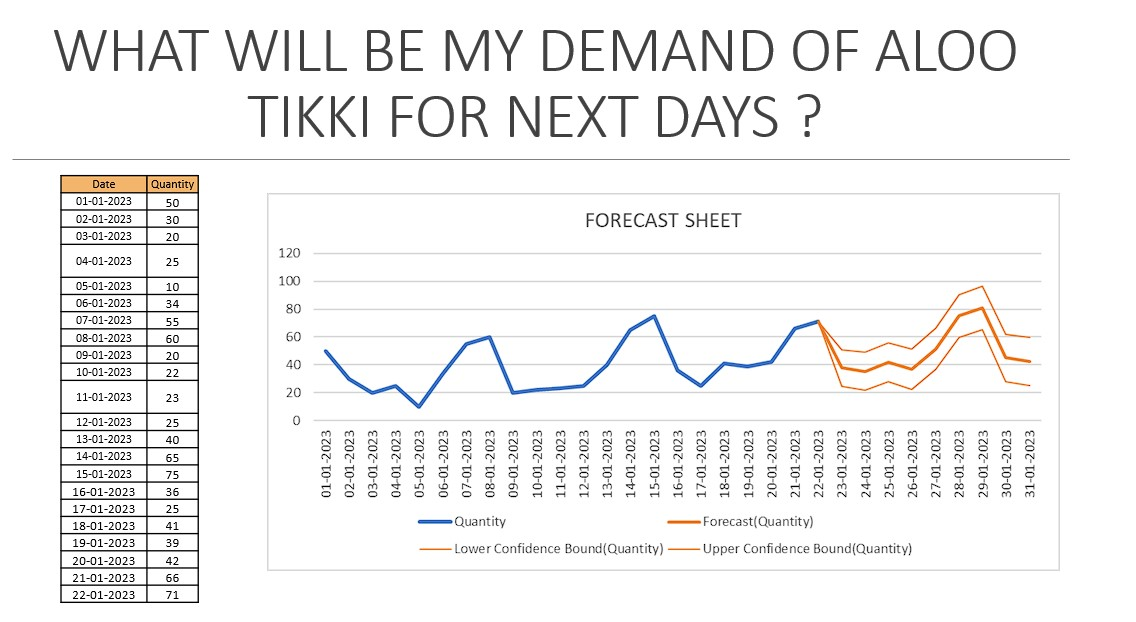

## Question 2: What are some common time series patterns, and how can they be identified and interpreted?
---

## Answer :

### Time series data often exhibit various patterns and structures that can provide valuable insights. Some common time series patterns include:

1. `Trend`: A trend refers to a long-term increase or decrease in the data over time. It represents the underlying direction or tendency of the series. Trends can be linear (constant rate of increase or decrease) or nonlinear (curved or irregular).

2. `Seasonality`: Seasonality refers to regular and predictable patterns that repeat at fixed intervals within the data. These patterns can occur daily, weekly, monthly, quarterly, or annually. Seasonality is often observed in economic, weather, and sales data.

3. `Cyclical Patterns`: Cyclical patterns refer to fluctuations or oscillations that occur over a longer time frame than seasonality. They are characterized by irregular durations and amplitudes and do not repeat at fixed intervals. Cyclical patterns are often seen in business cycles, economic indicators, and financial markets.

4. `Irregular/Random Fluctuations`: Irregular or random fluctuations represent the unpredictable and erratic components of the time series that cannot be attributed to any specific pattern or trend. They arise due to various factors such as noise, measurement errors, or unexpected events.

### Identifying and interpreting these time series patterns can be done using various techniques, such as:

1. `Visual Inspection`: Plotting the time series data on a graph can provide an initial visual understanding of the patterns present. Trend lines, seasonal cycles, and irregular fluctuations can be observed through visual inspection.

2. `Moving Averages`: Calculating moving averages (e.g., simple moving average or weighted moving average) can help smooth out random fluctuations and highlight underlying trends in the data.

3. `Decomposition`: Time series decomposition involves breaking down the series into its constituent components, such as trend, seasonality, and irregular fluctuations. Decomposition techniques like additive or multiplicative decomposition can aid in understanding and interpreting the individual patterns.

4. `Autocorrelation Analysis`: Autocorrelation analysis examines the correlation between a time series and its lagged values. It helps identify seasonality and potential dependence between observations at different time points.

5. `Statistical Tests`: Various statistical tests, such as the Augmented Dickey-Fuller (ADF) test for unit roots or the Box-Ljung test for autocorrelation, can provide quantitative measures to validate the presence of trends, seasonality, or randomness.

### Interpreting these patterns requires domain knowledge and context. For instance, identifying an increasing trend in sales data could imply business growth, while detecting a seasonal pattern in temperature data might indicate weather changes. Understanding the patterns can guide decision-making, forecasting, and developing appropriate models for analysis.

### Below is an example python code with AirPassangers Dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read the dataset
import pandas as pd
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
# Convert month to datetime
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
# Changing column name for #Passengers
df.columns = ['Month','nPass']

In [6]:
# Change index to month
df.index = df['Month']
df.head()

,Month,nPass
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [7]:
# Drop Month column
df = df.drop(labels=['Month'],axis=1)
df.head()

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


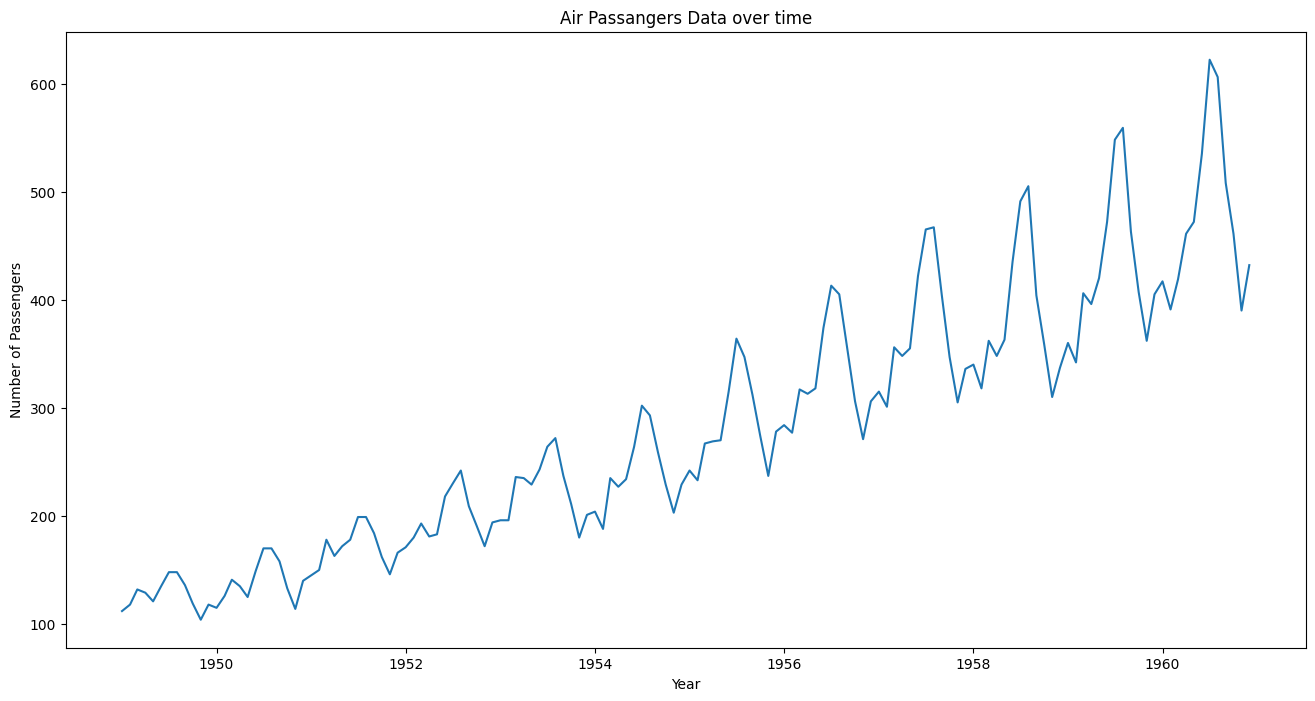

In [8]:
# Visualize time series
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['nPass'])
plt.title('Air Passangers Data over time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [9]:
# Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
T = seasonal_decompose(df['nPass'])

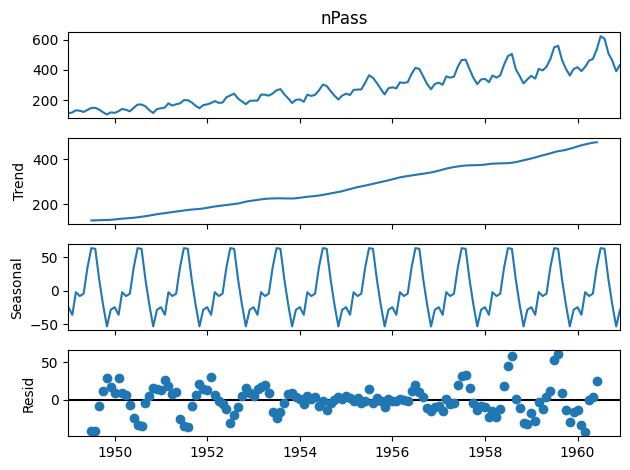

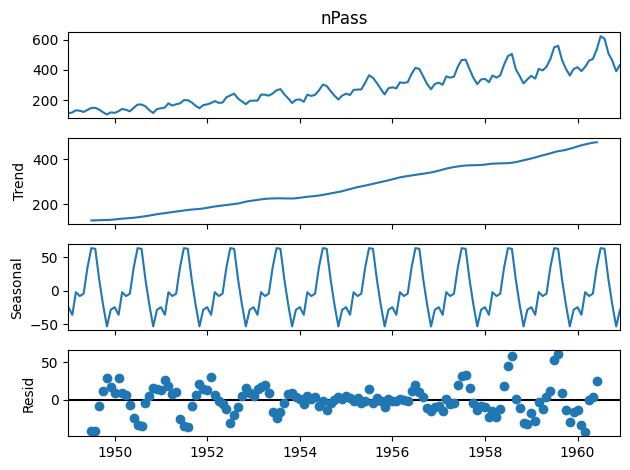

In [10]:
T.plot()

Text(0.5, 1.0, 'Residuals')

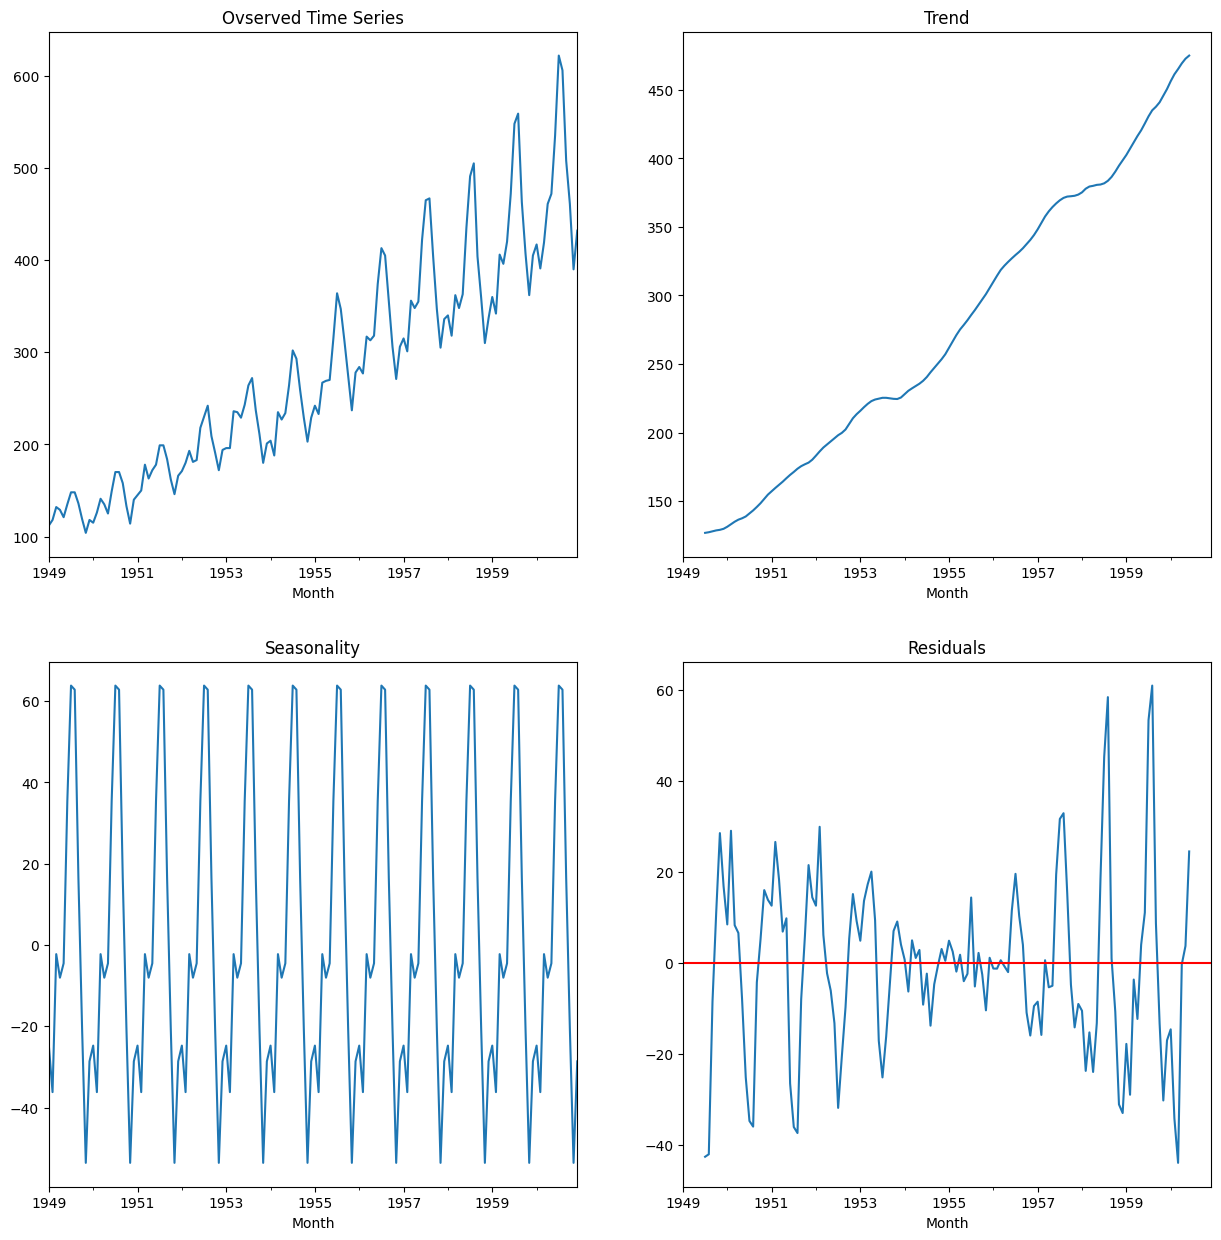

In [11]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
T.observed.plot()
plt.title('Ovserved Time Series')

plt.subplot(2,2,2)
T.trend.plot()
plt.title('Trend')

plt.subplot(2,2,3)
T.seasonal.plot()
plt.title('Seasonality')

plt.subplot(2,2,4)
T.resid.plot()
plt.axhline(y=0,c='red')
plt.title('Residuals')

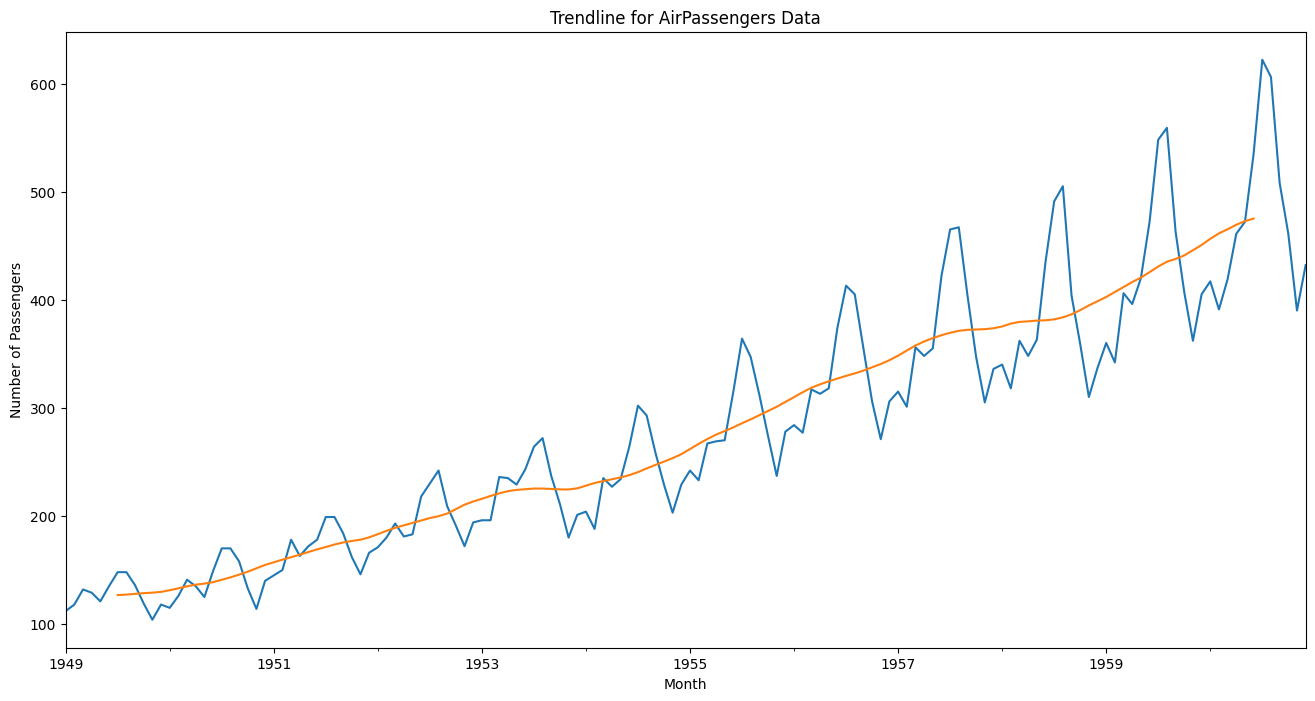

In [12]:
# Trend and Seasonality togethor
plt.figure(figsize=(16,8))
T.observed.plot()
T.trend.plot()
plt.title('Trendline for AirPassengers Data')
plt.ylabel('Number of Passengers')
plt.show()

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 3</p>

## Question 3: How can time series data be preprocessed before applying analysis techniques?
---

## Answer:

### Preprocessing time series data is an essential step before applying analysis techniques. It involves cleaning the data, handling missing values, addressing outliers, and transforming the data if necessary. Here are some common preprocessing steps for time series data:

1. `Handling Missing Values`: Missing values can disrupt the continuity of time series data. Depending on the extent of missing data, you can either remove the affected data points, interpolate missing values using methods like linear interpolation or spline interpolation, or apply more advanced techniques like imputation algorithms.

2. `Outlier Detection and Treatment`: Outliers are extreme values that deviate significantly from the normal pattern of the data. Outliers can distort analysis results and models. Robust statistical methods, such as the Median Absolute Deviation (MAD) or the Z-score, can be employed to detect outliers. Outliers can be removed or adjusted based on the specific analysis requirements and domain knowledge.

3. `Resampling and Frequency Conversion`: Time series data might be recorded at different frequencies (e.g., irregular intervals or different time resolutions). Resampling techniques, such as upsampling (increasing frequency) or downsampling (decreasing frequency), can be used to standardize the data to a desired frequency or regular time intervals. This can be achieved through interpolation methods like linear interpolation, spline interpolation, or using aggregation techniques like mean, sum, or median.

4. `Normalization and Scaling`: Data normalization or scaling is often performed to bring the values within a similar range or distribution. Common techniques include Min-Max scaling, Z-score standardization, or scaling based on the maximum absolute value. Normalizing the data can help in comparing and interpreting different time series and can be particularly useful when working with multiple variables.

5. `Detrending`: Detrending involves removing the trend component from the time series data, leaving behind the stationary component. This can be achieved by techniques like differencing (subtracting consecutive observations) or using advanced methods like polynomial regression or moving averages.

6. `Seasonal Adjustment`: If seasonality is present in the data, it may need to be adjusted or removed to focus on the underlying patterns. Seasonal adjustment techniques, such as seasonal differencing or seasonal decomposition of time series (e.g., using methods like seasonal and trend decomposition using Loess, or STL decomposition), can help in extracting the non-seasonal component.

7. `Handling Nonlinearities`: In some cases, time series data may exhibit nonlinear relationships. Nonlinear transformations, such as logarithmic transformation, square root transformation, or Box-Cox transformation, can help stabilize the variance and make the data more amenable to analysis techniques that assume linearity.

### It's important to note that the preprocessing steps applied may vary depending on the specific characteristics of the time series data and the analysis goals. Domain knowledge and understanding of the data are crucial for making informed preprocessing decisions.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 4</p>

## Question 4: How can time series forecasting be used in business decision-making, and what are some common challenges and limitations?
---

## Answer:

### Time series forecasting plays a crucial role in business decision-making by providing insights into future trends, patterns, and behavior of a time-dependent variable. Here's how time series forecasting can be used in business decision-making:

1. `Demand Forecasting`: Forecasting future demand is essential for inventory management, production planning, and supply chain optimization. By analyzing historical sales data and incorporating factors like seasonality, trends, and promotional activities, businesses can make informed decisions about inventory levels, pricing, and resource allocation.

2. `Sales and Revenue Forecasting`: Accurate sales and revenue forecasts help businesses set realistic targets, allocate resources effectively, and make informed decisions about sales strategies, marketing campaigns, and budget planning.

3. `Financial Planning`: Time series forecasting is utilized in financial planning and budgeting processes. It helps businesses project future revenues, expenses, and cash flows, enabling effective resource allocation, investment decisions, and risk management.

4. `Resource Allocation and Capacity Planning`: Forecasting allows businesses to estimate future resource requirements, such as staffing levels, production capacity, and infrastructure needs. It aids in efficient resource allocation, preventing underutilization or overutilization of resources.

5. `Risk Management`: Time series forecasting helps identify potential risks and uncertainties that may impact business operations. By analyzing historical data and forecasting future scenarios, businesses can develop contingency plans, assess potential losses, and mitigate risks.

6. `Marketing and Campaign Planning`: Forecasting assists in marketing campaign planning and optimization. By predicting customer behavior, market trends, and response to marketing efforts, businesses can design targeted campaigns, optimize marketing budgets, and improve customer engagement.

### Despite the benefits, there are some challenges and limitations associated with time series forecasting:

1, `Limited Historical Data`: Forecasting accuracy heavily relies on the availability and quality of historical data. Insufficient or unreliable data can lead to inaccurate forecasts and unreliable decision-making.

2. `Complex Patterns`: Time series data often exhibits complex patterns that can be challenging to capture accurately. Multiple components like seasonality, trends, and irregular fluctuations need to be considered, and identifying and modeling these patterns can be difficult.

3. `External Factors`: Time series analysis typically focuses on internal factors, but external factors such as economic conditions, regulatory changes, or market disruptions can significantly impact forecasts. Incorporating and accurately modeling these external factors can be challenging.

4. `Volatility and Non-Stationarity`: Some time series exhibit high volatility or non-stationarity, making it challenging to develop accurate forecasts. Special techniques like modeling volatility or handling non-stationarity are required in such cases.

5. `Forecast Horizon`: Forecast accuracy tends to decrease as the forecasting horizon extends into the future. Longer-term forecasts are more uncertain and susceptible to errors, limiting their reliability for long-range strategic planning.

6. `Forecast Updating`: Forecasting requires regular updating to account for new data and changes in business conditions. Failing to update forecasts can lead to inaccurate predictions and suboptimal decision-making.

### To mitigate these challenges, businesses should employ robust forecasting methods, consider a holistic approach that incorporates external factors, regularly update forecasts, and continuously monitor and validate the accuracy of predictions against actual outcomes.

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Question 5</p>

## Question 5: What is ARIMA modelling, and how can it be used to forecast time series data?
---

## Answer :

### ARIMA (AutoRegressive Integrated Moving Average) modeling is a widely used approach for forecasting time series data. It is a class of models that combines autoregressive (AR), differencing (I), and moving average (MA) components to capture different aspects of the underlying time series patterns.

### The ARIMA model is specified by three parameters: p, d, and q. These parameters determine the order of the autoregressive, differencing, and moving average components, respectively.

### Here's a breakdown of the components in ARIMA:

1. `Autoregressive (AR) Component`: The AR component considers the relationship between an observation and a certain number (p) of lagged observations. It captures the linear dependency of the current value on its past values. The AR(p) component can be represented as AR(p) = φ₁y(t-1) + φ₂y(t-2) + ... + φₚy(t-p), where φ₁, φ₂, ..., φₚ are the autoregressive coefficients.

2. `Differencing (I) Component`: The differencing component accounts for non-stationarity in the time series by taking differences between consecutive observations. The differencing parameter (d) specifies the order of differencing required to make the time series stationary. Stationarity is important because many time series models assume constant mean and variance over time.

3. `Moving Average (MA) Component`: The MA component considers the relationship between the error term and a certain number (q) of lagged error terms. It captures the short-term dependencies or shocks in the time series. The MA(q) component can be represented as MA(q) = θ₁ε(t-1) + θ₂ε(t-2) + ... + θₚε(t-q), where θ₁, θ₂, ..., θₚ are the moving average coefficients and ε(t-1), ε(t-2), ..., ε(t-q) are the error terms.

### The ARIMA model uses these components to represent the time series as a combination of its own past values, differencing to achieve stationarity, and a moving average of past errors. Once the ARIMA model is fitted to the historical data, it can be used to forecast future values.

### You can use the auto_arima function from the pmdarima library to automatically select the optimal parameters for the ARIMA model. Here's an example code using the auto_arima function:

In [13]:
# AirPassengers data
df

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
!pip install pmdarima

In [15]:
# Auto ARIMA to forecast data
from pmdarima.arima import auto_arima

# Fit ARIMA model using auto_arima m stands for lags to consider
model = auto_arima(df['nPass'],seasonal=True,suppress_warnings=True,m=12)

# Forecast future values
forecast, conf_int = model.predict(n_periods=36, return_conf_int=True)

# Print the forecasted values and confidence intervals
print('Forecast:')
print(forecast)
print('\n============================\n')
print('Confidence interval')
print(conf_int)

Forecast:
1961-01-01    445.634934
1961-02-01    420.395024
1961-03-01    449.198348
1961-04-01    491.839976
1961-05-01    503.394502
1961-06-01    566.862471
1961-07-01    654.260189
1961-08-01    638.597493
1961-09-01    540.883739
1961-10-01    494.126610
1961-11-01    423.332690
1961-12-01    465.507550
1962-01-01    479.290853
1962-02-01    454.176837
1962-03-01    483.086981
1962-04-01    525.819247
1962-05-01    537.450681
1962-06-01    600.983905
1962-07-01    688.436994
1962-08-01    672.821280
1962-09-01    575.147390
1962-10-01    528.424087
1962-11-01    457.658868
1962-12-01    499.858081
1963-01-01    513.662048
1963-02-01    488.565565
1963-03-01    517.490586
1963-04-01    560.235476
1963-05-01    571.877620
1963-06-01    635.419933
1963-07-01    722.880733
1963-08-01    707.271562
1963-09-01    609.603224
1963-10-01    562.884632
1963-11-01    492.123410
1963-12-01    534.326015
Freq: MS, dtype: float64


Confidence interval
[[423.34484757 467.92501952]
 [394.23539679

In [16]:
# Create a date range for the forecasted period
start_date = df.index[-1]
forecast_dates = pd.date_range(start=start_date, periods=len(forecast), freq='M')

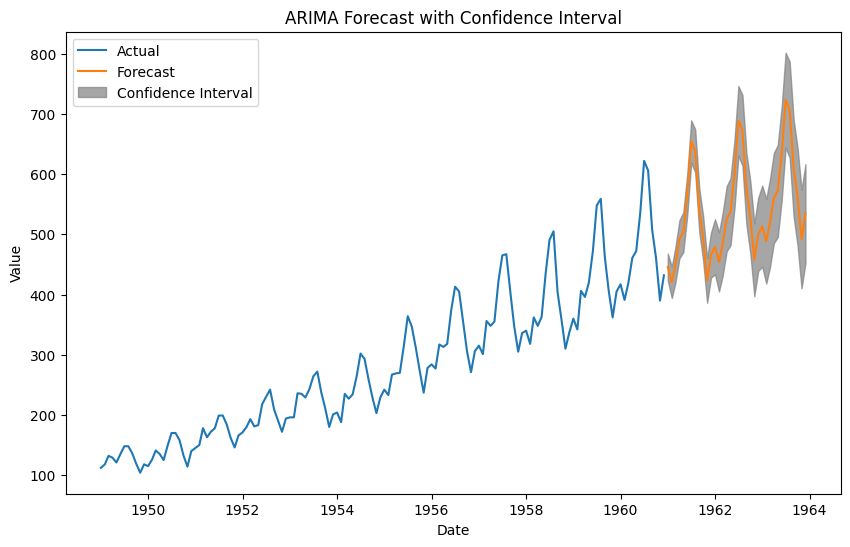

In [17]:
# Plot the forecasted values and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(df['nPass'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], alpha=0.7, color='gray', label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast with Confidence Interval')
plt.legend()
plt.show()

In [18]:
# Retrieve the values of p, d, and q
p = model.order[0]
d = model.order[1]
q = model.order[2]

# Print the values of p, d, and q
print("Optimal values: p =", p, ", d =", d, ", q =", q)

Optimal values: p = 2 , d = 1 , q = 1


## Question 6: How do Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots help in identifying the order of ARIMA models?
---

## Answer :

### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are useful tools for identifying the order of ARIMA models by providing insights into the correlation structure of the time series data. Here's how these plots can help:

### Autocorrelation Function (ACF) Plot:

The ACF plot shows the correlation between an observation in the time series and its lagged values at different time lags. It helps identify the order of the Moving Average (MA) component (q) in the ARIMA model. The ACF plot is interpreted as follows:
* If the ACF plot shows a significant spike at lag k followed by a sharp cutoff, it suggests an MA(q) model is appropriate. The lag k indicates the order of the MA component.
* If the ACF plot gradually decays or shows a sinusoidal pattern, it suggests the presence of an autoregressive component (AR). In this case, the ACF plot is used in conjunction with the PACF plot to determine the order of the AR component.

### Partial Autocorrelation Function (PACF) Plot:

The PACF plot shows the correlation between an observation and its lagged values after removing the contributions of the intermediate lags. It helps identify the order of the Autoregressive (AR) component (p) in the ARIMA model. The PACF plot is interpreted as follows:
* If the PACF plot shows a significant spike at lag k followed by a sharp cutoff, it suggests an AR(p) model is appropriate. The lag k indicates the order of the AR component.
* If the PACF plot gradually decays or shows a sinusoidal pattern, it suggests the presence of a moving average component (MA). In this case, the PACF plot is used in conjunction with the ACF plot to determine the order of the MA component.

### By examining the ACF and PACF plots, you can identify the appropriate order of the ARIMA model. For example, if the ACF plot shows a sharp cutoff at lag k and the PACF plot shows a significant spike at lag m, you might consider an ARMA(p, q) model. If the ACF plot shows a gradual decay and the PACF plot shows a sharp cutoff at lag m, you might consider an AR(p) model. Similarly, if the ACF plot shows a sharp cutoff and the PACF plot shows a gradual decay, you might consider an MA(q) model.

### It's important to note that the interpretation of ACF and PACF plots can be subjective and may require expertise and judgment. Additionally, other factors such as domain knowledge, model diagnostics, and statistical criteria (e.g., AIC, BIC) should also be considered when determining the order of ARIMA models.

### Below is python code to do ACF and PACF Plots:

In [19]:
# AirPassengers data
df

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


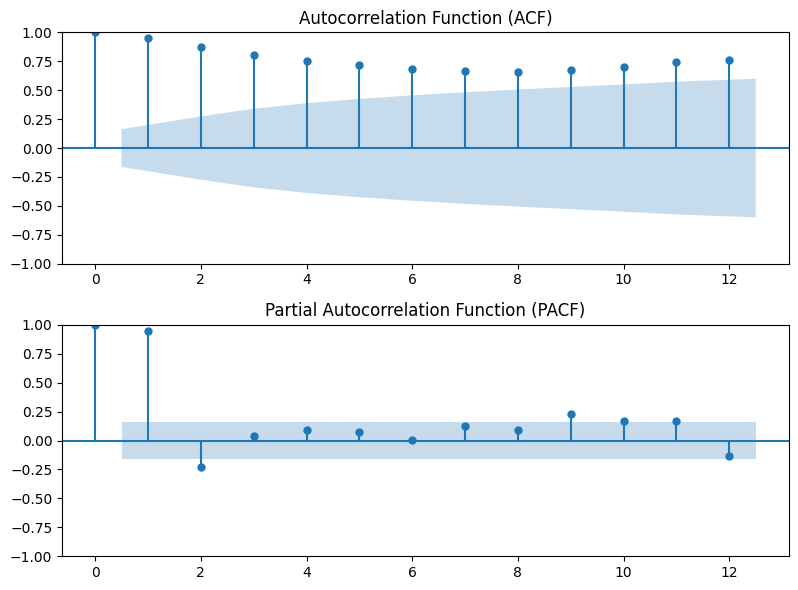

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create ACF and PACF plots
fig, ax = plt.subplots(nrows=2, figsize=(8, 6))

# ACF plot
plot_acf(df['nPass'], lags=12, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['nPass'], lags=12, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

## Question 7: What are the assumptions of ARIMA models, and how can they be tested for in practice?
---

## Answer:

### ARIMA (Autoregressive Integrated Moving Average) models make several assumptions to ensure the validity and reliability of the model results. Here are the key assumptions of ARIMA models:

1. `Stationarity`: ARIMA models assume that the time series is stationary, which means that the statistical properties of the series remain constant over time. Stationarity is crucial for the model to capture the underlying patterns effectively. To test for stationarity, you can perform statistical tests such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. Additionally, visual inspection of the time series plot and examining the mean and variance over time can provide insights into stationarity.

2. `Linearity`: ARIMA models assume that the relationship between the time series and its lagged values is linear. You can visually inspect the scatter plot of the time series and its lagged values or perform statistical tests like the Box-Ljung test to assess linearity.

3. `No Autocorrelation`: ARIMA models assume that the residuals (or errors) of the model are not correlated. Autocorrelation in the residuals indicates that the model has not captured all the relevant information in the data. You can examine the ACF plot of the residuals or perform statistical tests like the Ljung-Box test to check for autocorrelation.

4. `No Multicollinearity`: If you include exogenous variables in your ARIMA model (ARIMAX model), it is important to ensure that these variables do not exhibit multicollinearity. Multicollinearity occurs when there is a high correlation between the independent variables, which can lead to unreliable coefficient estimates. You can assess multicollinearity using methods like correlation analysis or variance inflation factor (VIF) analysis.

### In practice, you can test these assumptions by applying various statistical tests, conducting visual inspections, and performing diagnostic checks on the ARIMA model. It is also important to consider domain knowledge and interpret the results in the context of the specific problem or application.

### If the assumptions are violated, it may be necessary to apply data transformations, such as differencing or logarithmic transformations, to achieve stationarity or address other issues. Additionally, alternative modeling techniques may be considered if the assumptions cannot be satisfied.

## Question 8: Suppose you have monthly sales data for a retail store for the past three years. Which type of time series model would you recommend for forecasting future sales, and why?
---

## Answer :

### In order to recommend a specific type of time series model for forecasting future sales based on the given data, it would be helpful to analyze the characteristics and patterns present in the monthly sales data. However, without access to the actual data, I can provide a general recommendation based on common scenarios.

### Given that you have monthly sales data for the past three years, it suggests a continuous time series with a regular interval. In this case, I would recommend considering an ARIMA (Autoregressive Integrated Moving Average) model as a starting point for forecasting future sales. ARIMA models are suitable for capturing both the autoregressive (AR) and moving average (MA) components of the data, as well as handling the effects of trend and seasonality.

### Here's a rationale for considering an ARIMA model:

1. `Trend`: ARIMA models can capture the underlying trend in the sales data, which may provide insights into long-term growth or decline patterns. The integrated (I) component of ARIMA allows for differencing to remove trends if necessary.

2. `Seasonality`: If there are recurring seasonal patterns in the sales data (e.g., monthly peaks or dips), an ARIMA model can incorporate seasonal differencing or a seasonal ARIMA (SARIMA) model can be applied to capture and forecast seasonal variations.

3. `Previous Observations`: ARIMA models utilize lagged observations of the dependent variable, allowing the model to consider the relationship between the current and past sales values. This enables the model to capture any autocorrelation or dependence in the sales data.

### It's important to note that this recommendation is a general starting point, and the specific model selection should be based on a thorough analysis of the data, including visualization, examination of autocorrelation and partial autocorrelation plots, and consideration of domain knowledge.

### In some cases, additional factors such as external variables (e.g., advertising spending, promotions, holidays) or specific characteristics of the sales data (e.g., sudden shifts, outliers) may suggest the need for more advanced models, such as ARIMAX (ARIMA with exogenous variables) or other forecasting techniques like seasonal decomposition of time series (STL) or machine learning models.

### Ultimately, the selection of the most suitable time series model for forecasting future sales depends on the specific characteristics and patterns observed in the data, as well as the specific goals and requirements of the forecasting task.

## Question 9: What are some of the limitations of time series analysis? Provide an example of a scenario where the limitations of time series analysis may be particularly relevant.
---

## Answer :

### Time series analysis has several limitations that should be considered when applying it to real-world data. Some of the limitations include:

1. `Limited Predictive Power`: Time series analysis assumes that future patterns and trends will resemble those observed in the past. However, there may be unforeseen events or changes in underlying factors that can significantly impact the future behavior of the time series. Time series models might struggle to capture and predict such abrupt changes.

2. `Lack of Causality`: Time series analysis focuses on identifying patterns and relationships within the data, but it does not inherently establish causal relationships. Correlation does not imply causation, and time series analysis alone may not be sufficient to identify the underlying drivers or factors influencing the observed patterns.

3. `Sensitivity to Outliers`: Time series models can be sensitive to outliers, anomalies, or extreme values in the data. These outliers can distort model estimation and lead to inaccurate forecasts if not appropriately handled.

4. `Limited Handling of Nonlinear Relationships`: Traditional time series models, such as ARIMA, assume linear relationships between variables. If the underlying relationship is highly nonlinear, these models may not capture the complexity of the data accurately. Advanced techniques like nonlinear time series models or machine learning algorithms may be more suitable in such cases.

5. `Limited Handling of High-Dimensional Data`: Time series analysis can become challenging when dealing with high-dimensional data, such as multivariate time series or data with a large number of features. The complexity of modeling and interpreting relationships increases, requiring more advanced modeling techniques and computational resources.

### An example scenario where the limitations of time series analysis may be relevant is the impact of a major economic recession on sales forecasting. If the historical sales data used for forecasting does not account for economic recessions, the time series analysis may fail to capture the significant decline in sales during such periods. Traditional time series models might assume the past patterns will continue, leading to overly optimistic forecasts. In this case, incorporating external factors like economic indicators or using more advanced modeling techniques that can handle regime shifts or nonlinear relationships might be necessary to overcome these limitations.

### It's essential to be aware of these limitations and evaluate the suitability of time series analysis in each specific context, considering the characteristics of the data and the goals of the analysis. Augmenting time series analysis with other techniques and incorporating domain knowledge can help mitigate some of these limitations and improve the accuracy and robustness of the forecasting results.

## Question 10: Explain the difference between a stationary and non-stationary time series. How does the stationarity of a time series affect the choice of forecasting model?
---

## Answer:

### A stationary time series is one where the statistical properties remain constant over time. It exhibits a stable mean, constant variance, and autocovariance that does not depend on time. In simpler terms, the data points in a stationary time series do not show any systematic trend, seasonality, or long-term structural changes.

### On the other hand, a non-stationary time series does not exhibit these stable properties. It may have a changing mean, a varying variance, or a trend (upward or downward) over time. Non-stationary time series can also exhibit seasonality or other patterns that evolve over time.

### The stationarity of a time series has a significant impact on the choice of forecasting model. Here's how:

1. `Stationary Time Series`: If a time series is stationary, it is relatively easier to model and forecast. Stationary series have stable statistical properties, which means that patterns observed in the past are likely to continue into the future. Standard forecasting models, such as ARIMA or exponential smoothing, can be effective in capturing and forecasting the patterns present in a stationary time series. These models assume stationarity and make use of the autocorrelation structure to make accurate forecasts.

2. `Non-Stationary Time Series`: Non-stationary time series pose challenges for traditional forecasting models because the patterns and statistical properties change over time. Models like ARIMA assume stationarity and may provide unreliable forecasts for non-stationary data. In such cases, it is necessary to transform the data to achieve stationarity. Common techniques include differencing (to remove trends), seasonal differencing (to handle seasonality), or logarithmic transformations. Once the data is transformed to a stationary form, ARIMA or other forecasting models can be applied to make reliable forecasts.

### In summary, the stationarity of a time series affects the choice of forecasting model. If the time series is stationary, traditional forecasting models designed for stationary data can be used. However, if the time series is non-stationary, it requires pre-processing techniques to transform it into a stationary form before applying forecasting models. By achieving stationarity, the underlying patterns in the data can be captured and used for accurate forecasting.